In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex
from qiskit.circuit.library import UGate
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

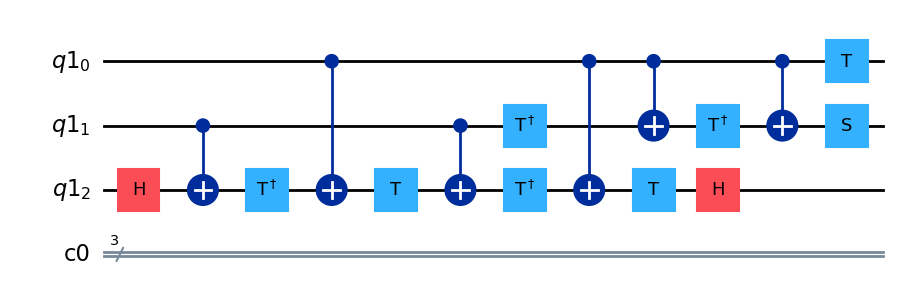

In [3]:
Qubits = QuantumRegister(3)
Cbits = ClassicalRegister(3)

Toffoli = QuantumCircuit(Qubits, Cbits)

#Toffoli.x(0)
#Toffoli.x(1)
#Toffoli.x(2)

Toffoli.h(2)
Toffoli.cx(1,2)
Toffoli.tdg(2)
Toffoli.cx(0,2)
Toffoli.t(2)
Toffoli.cx(1,2)
Toffoli.tdg(2)
Toffoli.cx(0,2)
Toffoli.tdg(1)
Toffoli.t(2)
Toffoli.h(2)
Toffoli.cx(0,1)
Toffoli.tdg(1)
Toffoli.cx(0,1)
Toffoli.t(0)
Toffoli.s(1)

display(Toffoli.draw(output='mpl'))



In [4]:
U = Operator(Toffoli)

display(array_to_latex(U))

<IPython.core.display.Latex object>

In [5]:
Toffoli.measure(0,0)
Toffoli.measure(1,1)
Toffoli.measure(2,2)

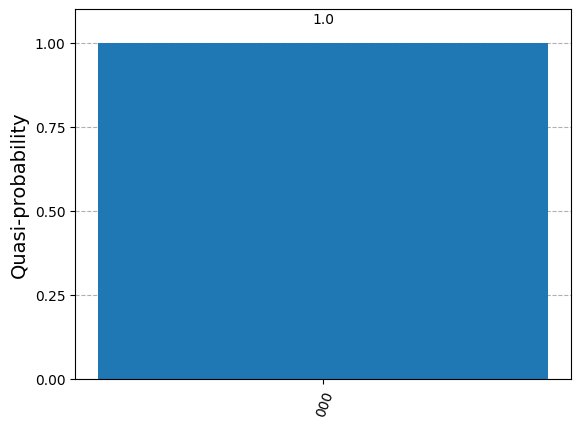

In [6]:
results = Sampler().run(Toffoli).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

Another representation of Toffoli using only 2-qubit gates

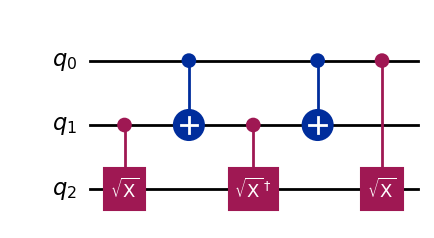

In [38]:
Toffoli = QuantumCircuit(3)

Toffoli.csx(1,2)
Toffoli.cx(0,1)
Toffoli.csx(1,2).inverse()
Toffoli.cx(0,1)
Toffoli.csx(0,2)

display(Toffoli.draw(output='mpl'))
Toffoli.save_unitary()

In [39]:
simulator = AerSimulator(method = 'unitary')
circuit = transpile(Toffoli, simulator)
results = simulator.run(circuit).result()
unitary = results.get_unitary(circuit)
array_to_latex(unitary)

<IPython.core.display.Latex object>